Double-click

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/SampleSuperstore (1).csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 17


**Data Cleaning**

In [7]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
df.drop(columns="Postal Code", inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Descriptive Statistics**

In [9]:
sales_stats = df['Sales'].describe()
avg_order_value = df['Sales'].mean()
total_sales = df['Sales'].sum()

print("Sales Statistics:")
print(sales_stats)
print("Average Order Value:", avg_order_value)
print("Total Sales:", total_sales)

Sales Statistics:
count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: Sales, dtype: float64
Average Order Value: 230.14890150345792
Total Sales: 2296195.5903


**Visualizing the distribution of sales**

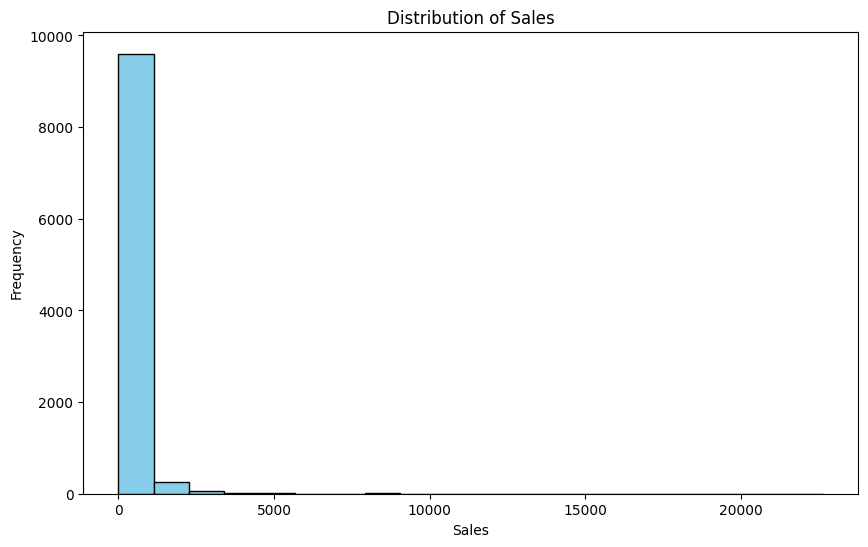

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

<Axes: xlabel='Region'>

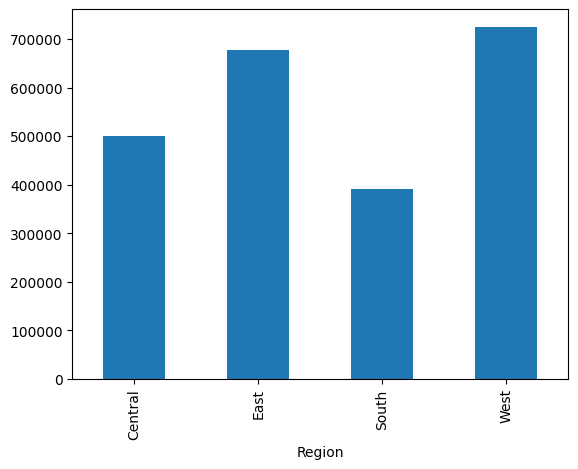

In [ ]:
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: xlabel='Region'>

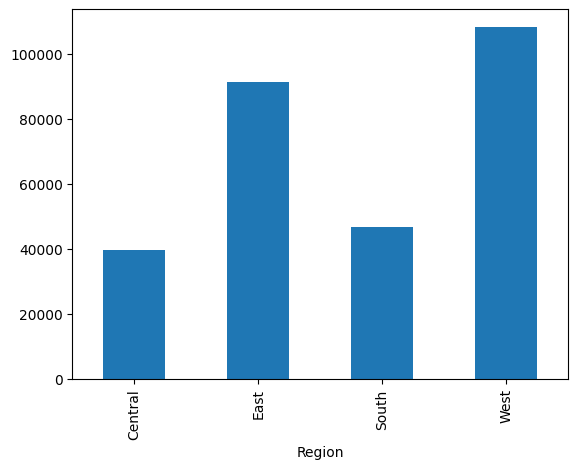

In [ ]:
df.groupby("Region")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

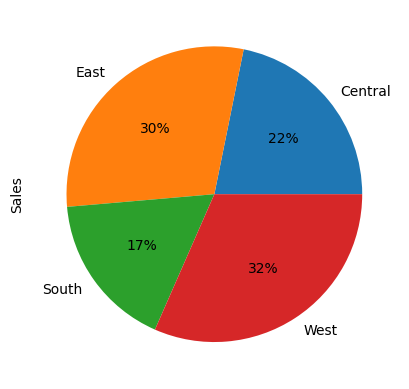

In [ ]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

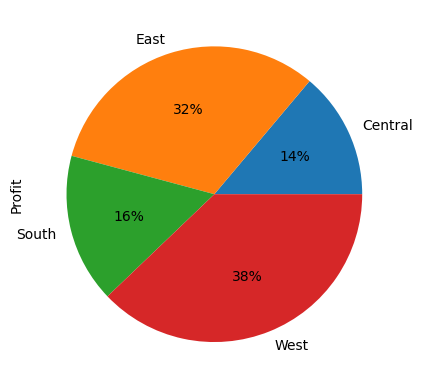

In [ ]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

**Customer Segmentation**

In [11]:
customer_segments = pd.cut(df.groupby('Segment')['Sales'].sum(), bins=3, labels=['Low-value', 'Medium-value', 'High-value'])
print("Customer Segments based on Total Purchase Amount:")
print(customer_segments)

Customer Segments based on Total Purchase Amount:
Segment
Consumer         High-value
Corporate      Medium-value
Home Office       Low-value
Name: Sales, dtype: category
Categories (3, object): ['Low-value' < 'Medium-value' < 'High-value']


<Axes: xlabel='Segment'>

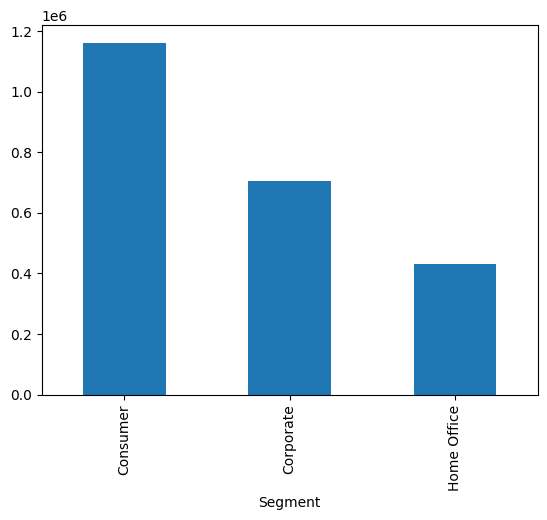

In [ ]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<Axes: xlabel='Segment'>

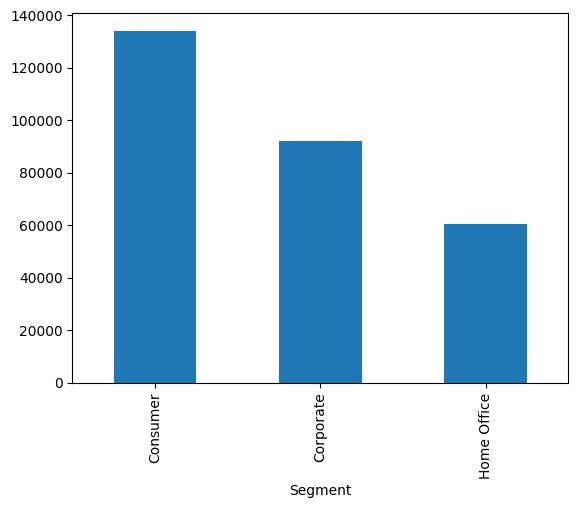

In [ ]:
df.groupby("Segment")["Profit"].sum().plot.bar()

**Product Analysis**

In [12]:
# Top-selling products and categories
top_products = df.groupby('Sub-Category')['Sales'].sum().nlargest(10)
top_categories = df.groupby('Category')['Sales'].sum().nlargest()

print("Top Selling Products:")
print(top_products)
print("\nTop Selling Categories:")
print(top_categories)


Top Selling Products:
Sub-Category
Phones         330007.0540
Chairs         327777.7610
Storage        223843.6080
Tables         206965.5320
Binders        203409.1690
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

Top Selling Categories:
Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64


<Axes: xlabel='Category'>

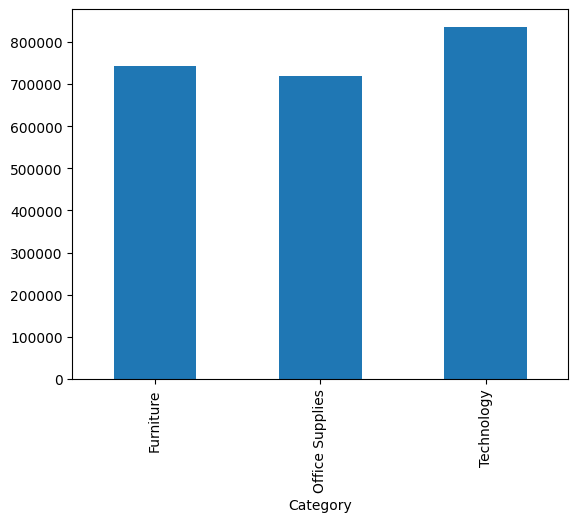

In [ ]:
df.groupby("Category")["Sales"].sum().plot.bar()

<Axes: xlabel='Category'>

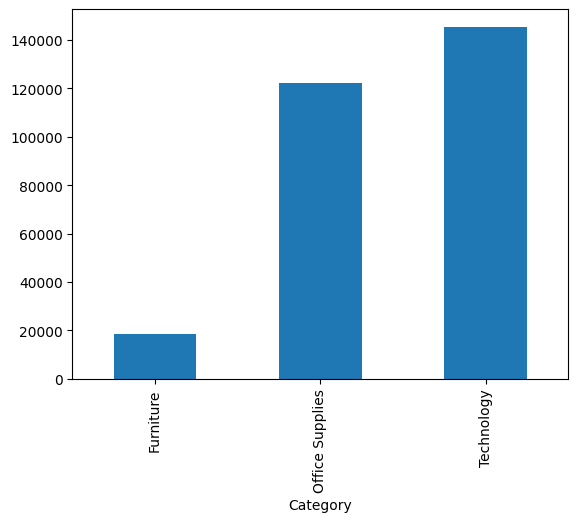

In [16]:
df.groupby("Category")["Profit"].sum().plot.bar()

**Visualizing the sales and profit in different states**

<Axes: xlabel='State'>

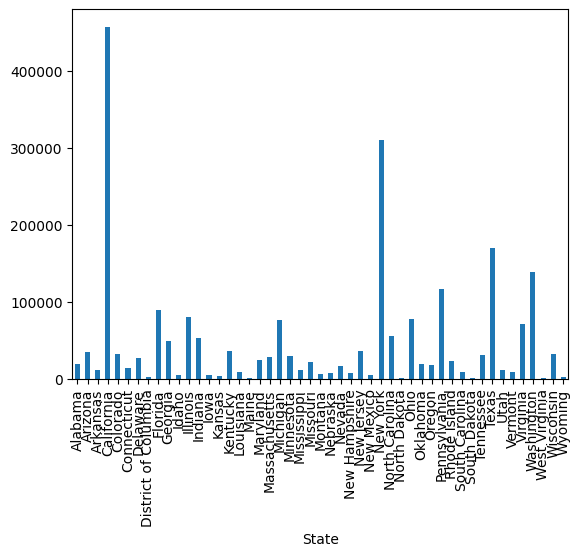

In [15]:
df.groupby("State")["Sales"].sum().plot.bar()

<Axes: xlabel='State'>

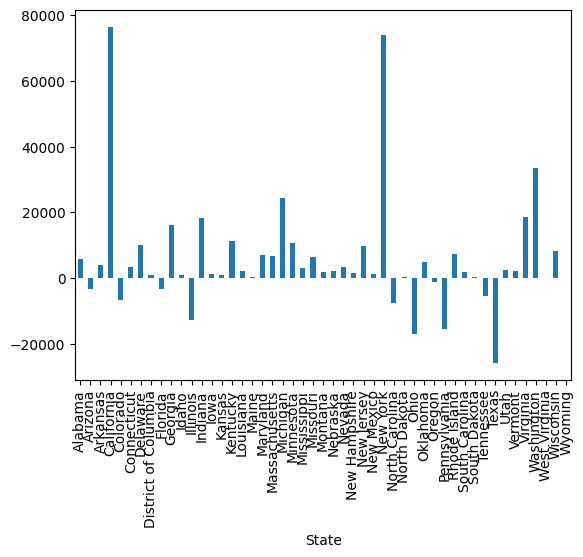

In [14]:
df.groupby("State")["Profit"].sum().plot.bar()